# Network Analysis on Auckland road data
### Import packages

In [1]:
import numpy as np
import pandas as pd
import osmnx as ox
import geopandas as gpd
from shapely.geometry import MultiPolygon, Point
from shapely.ops import transform
import pyproj
import networkx as nx
import math
import matplotlib.pyplot as plt
from pyproj import CRS
import itertools

### Generating or importing the road network

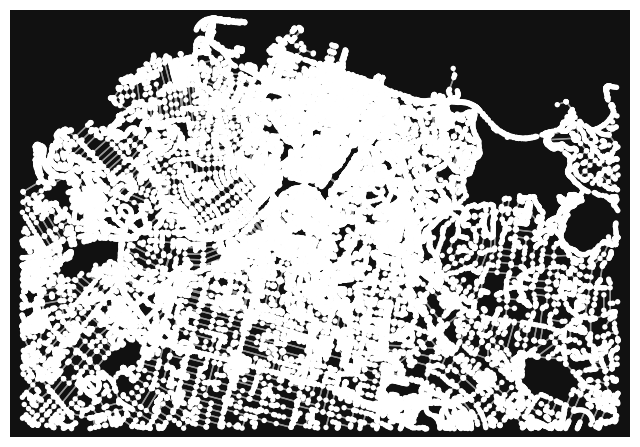

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [2]:
Gsmol = ox.graph.graph_from_address("Auckland, New Zealand", network_type="walk", simplify = False, dist =5000)
ox.plot_graph(Gsmol)

### Nearest distances

# Adding other data
### Import the grid of urban Auckland including census variables
The IDW was done in R. Code in the file data-prep.R

<AxesSubplot: >

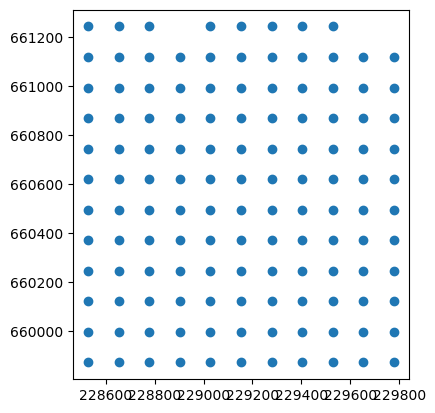

In [3]:
grid = gpd.read_file("data/geographic/grids/sample_grid_all.gpkg")
grid['lon'] = grid['geometry'].x
grid['lat'] = grid['geometry'].y
grid.plot()

### Import the train stations in Auckland
The IDW was done in R. Code in the file data-prep.R

<AxesSubplot: >

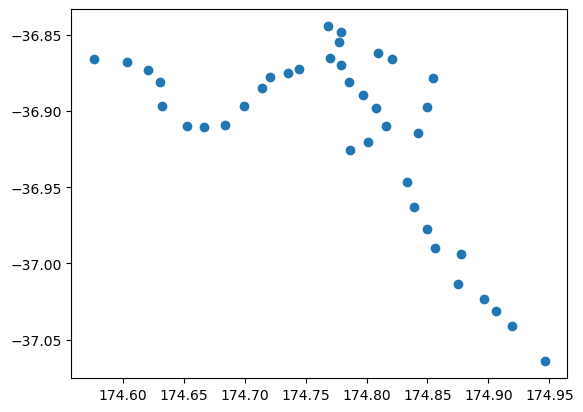

In [4]:
stations = gpd.read_file("data/transport/public_transport/trains_auckland_with_distances_on_network.gpkg")
stations['lon'] = stations['geometry'].x
stations['lat'] = stations['geometry'].y
stations.plot()

In [5]:
nodes_proj, edges_proj = ox.graph_to_gdfs(Gsmol, nodes=True, edges=True)

In [6]:
grid2 = grid

In [ ]:
# define function for the nearest neighbour
def nearest_node(a,b):
    nearest_node,dist=ox.distance.nearest_nodes(Gsmol, (a,b), return_dist=True, method = 'euclidean')  
    return nearest_node, dist

In [10]:
stations = stations.to_crs(grid.crs)

In [19]:
for pidx, point in enumerate(grid.itertuples()):
    orig_node, dist_origin_to_edge = ox.distance.nearest_nodes(Gsmol, point.geometry.x, point.geometry.y, return_dist=True) 
    o_closest = nodes_proj.loc[orig_node]
    
    for sidx, station in enumerate(stations.itertuples()):
        target_node, dist_target_to_edge = ox.distance.nearest_nodes(Gsmol, station.lon, station.lat, return_dist=True)
        t_closest = nodes_proj.loc[target_node]
        #od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
        shortest_path_length = nx.shortest_path_length(Gsmol, source=orig_node, target=target_node, weight='length')
        shortest_path_full_length = shortest_path_length #+ dist_origin_to_edge + dist_target_to_edge
        
        dict_station_dist = {}
        keys=[]
        values=[]
        keys.append(station.STOPNAME)
        values.append(shortest_path_full_length)

        for key, value in zip(keys, values):
            dict_station_dist[key] = value

        closest_station = min(dict_station_dist, key=dict_station_dist.get) #min alphabetically max(stats, key=stats.get)
        minimum_distance = min(dict_station_dist.values())
        #print(dict_station_dist)
    print("Doing point", pidx, ". Distance to nearest station: ", closest_station, " is ", minimum_distance)

    #grid2.loc[pidx].shortest_distance_to_station = minimum_dist    

Doing point 0 . Distance to nearest station:  Penrose Train Station  is  938.117
Doing point 1 . Distance to nearest station:  Penrose Train Station  is  11642.957000000004
Doing point 2 . Distance to nearest station:  Penrose Train Station  is  10856.858999999993
Doing point 3 . Distance to nearest station:  Penrose Train Station  is  938.117


KeyboardInterrupt: 

In [39]:
grid2.head(40)

,income,no_households,maori_pr,dampness,geometry,lon,lat,shortest_distance_to_station
0,36794.543326,98.127690,0.057289,106.352366,POINT (227654.838 659745.889),227654.838387,659745.888519,1.006744e+07
1,35878.211275,102.782137,0.069748,122.412572,POINT (227779.681 659745.889),227779.681269,659745.888519,1.006744e+07
2,27770.128835,86.412036,0.053030,123.776598,POINT (227904.524 659745.889),227904.524150,659745.888519,1.006744e+07
3,38967.926453,105.735415,0.044627,88.687944,POINT (227529.996 659870.731),227529.995506,659870.731400,1.006744e+07
4,34764.978764,110.045951,0.062813,107.494800,POINT (227654.838 659870.731),227654.838387,659870.731400,1.006744e+07
5,33080.799126,119.315940,0.072203,103.862717,POINT (227779.681 659870.731),227779.681269,659870.731400,1.006744e+07
6,29461.867071,106.405369,0.085569,116.648626,POINT (227904.524 659870.731),227904.524150,659870.731400,1.006744e+07
7,21227.033643,109.432753,0.075976,95.596211,POINT (228029.367 659870.731),228029.367031,659870.731400,1.006744e+07
8,16874.272180,124.679583,0.097016,80.346593,POINT (228154.210 659870.731),228154.209913,659870.731400,1.006744e+07
9,15108.064789,154.563136,0.053430,117.162049,POINT (228279.053 659870.731),228279.052794,659870.731400,1.006744e+07
